In [2]:
pip install tensorflow==2.10.0


  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\chint\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 6s 0us/step


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 17s 17ms/step - loss: 0.1605 - accuracy: 0.9503 - val_loss: 0.0495 - val_accuracy: 0.9843
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0317 - val_accuracy: 0.9882
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0341 - val_accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 28s 29ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0288 - val_accuracy: 0.9913


313/313 - 1s - loss: 0.0298 - accuracy: 0.9908 - 1s/epoch - 4ms/step
Test accuracy: 0.9908000230789185
1/1 [==============================] - 0s 13ms/step


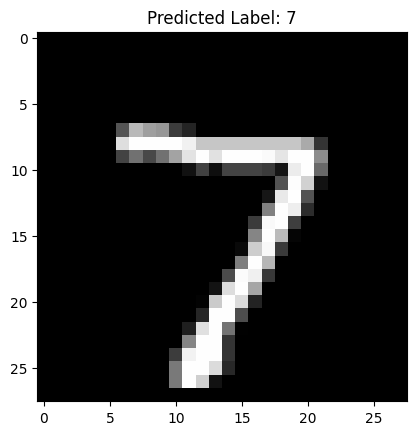

In [11]:
# Evaluation: Checks the model’s performance on unseen test data.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Prediction: Tests the model on a single image and visualizes the result.
prediction = model.predict(np.expand_dims(x_test[0], axis=0))  # Predict on the first test image
predicted_label = np.argmax(prediction)

# Visualize the prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

# Saving: Stores the trained model for future use.
model.save('mnist_cnn_model.h5')